## Geometric transformation on image
Learn to apply different geometric transformation to images like translation, rotation, affine transformation etc.

In [1]:
#import required modeules
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Image scale, just resizing an image
Scaling is just resizing of the image. OpenCV comes with a function **cv2.resize()** for this purpose. The size of the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are used.

In [11]:
img = cv2.imread('g_and_a.jpeg')
res = cv2.resize(img,None,fx=2, fy=3, interpolation = cv2.INTER_CUBIC)

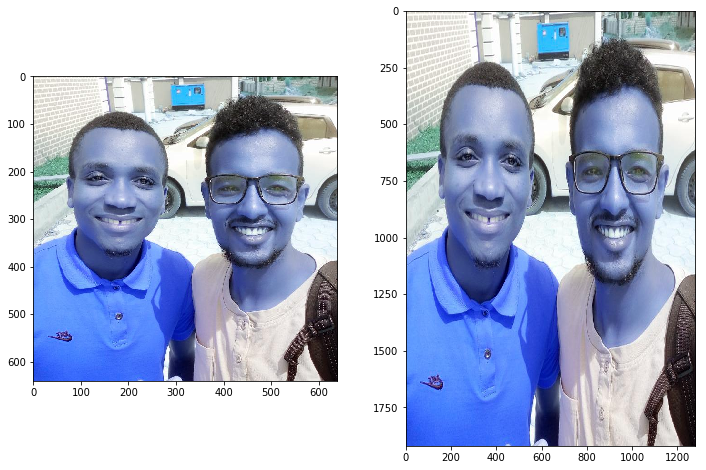

In [12]:
plt.figure(figsize=(12,8))
ax = plt.subplot(1,2,1)
ax.imshow(img)
ax = plt.subplot(1,2,2)
ax.imshow(res)

#### Translation, shifting of object’s location

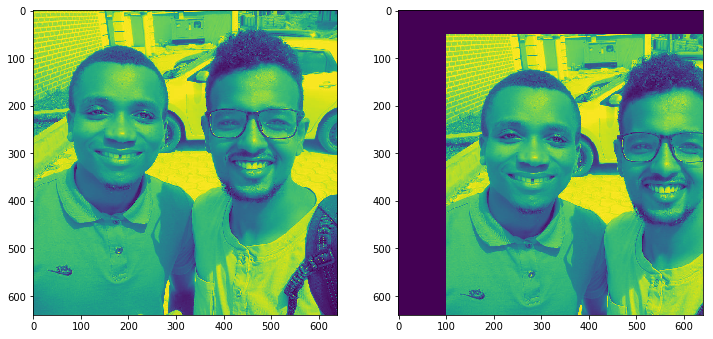

In [18]:
img = cv2.imread('g_and_a.jpeg',0)
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

# cv2.imshow('img',dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(12,8))
ax = plt.subplot(1,2,1)
ax.imshow(img)
ax = plt.subplot(1,2,2)
ax.imshow(dst)

#### Rotation
Rotation of an image for a certain angle is achieved by the transformation matrix 

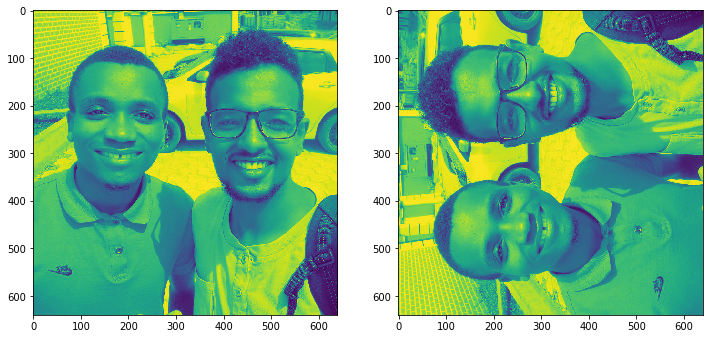

In [20]:
img = cv2.imread('g_and_a.jpeg',0)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(12,8))
ax = plt.subplot(1,2,1)
ax.imshow(img)
ax = plt.subplot(1,2,2)
ax.imshow(dst)

#### Affine Transformation

In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from input image and their corresponding locations in output image. 

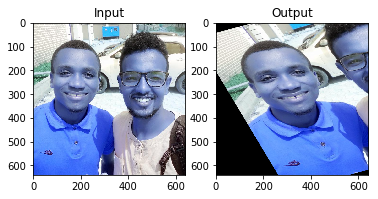

In [26]:
img = cv2.imread('g_and_a.jpeg')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

#### Perspective Transformation

For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. 

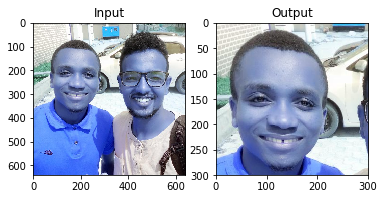

In [29]:
img = cv2.imread('g_and_a.jpeg')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()